<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/03.04.2024/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [24]:
housing = df[df.district=="Чиланзарский"]
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


# Train/Test split

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

# ML

In [26]:
from sklearn import linear_model

MLR_model = linear_model.LinearRegression()
#x_train = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
x_train = np.asanyarray(train_set[['size', 'max_levels']])
y_train = np.asanyarray(train_set[['price']])

MLR_model.fit(x_train, y_train)

print('Coefficients: ', MLR_model.coef_)
print('theta0 : ', MLR_model.intercept_)

Coefficients:  [[ 747.04795007 -393.4032521 ]]
theta0 :  [1341.57534414]


# Modelni baholash.

In [27]:
#x_test = np.asanyarray(test_set[['rooms' , 'size', 'level', 'max_levels']])
x_test = np.asanyarray(test_set[['size', 'max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7193.9223780657785
RMSE=12635.660248895361


# Non-linear Regression
  * Polynomial Regresssion

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


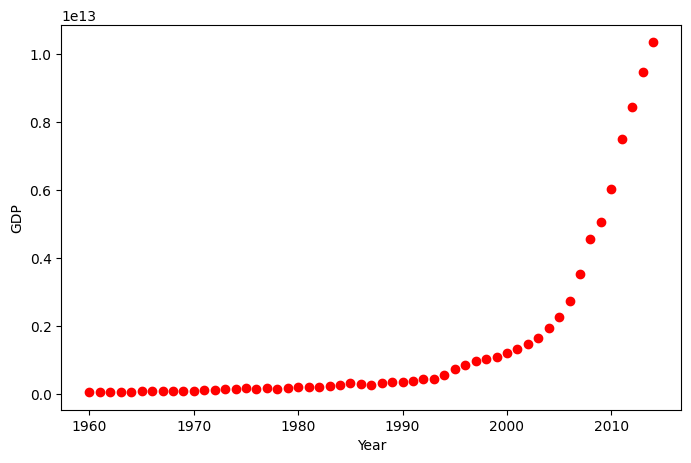

In [31]:
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

**Ma'lumotlarni ajratib olamiz va Normalizasiya qilamiz.**

In [32]:
X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

* Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
yhat = model.predict(X)

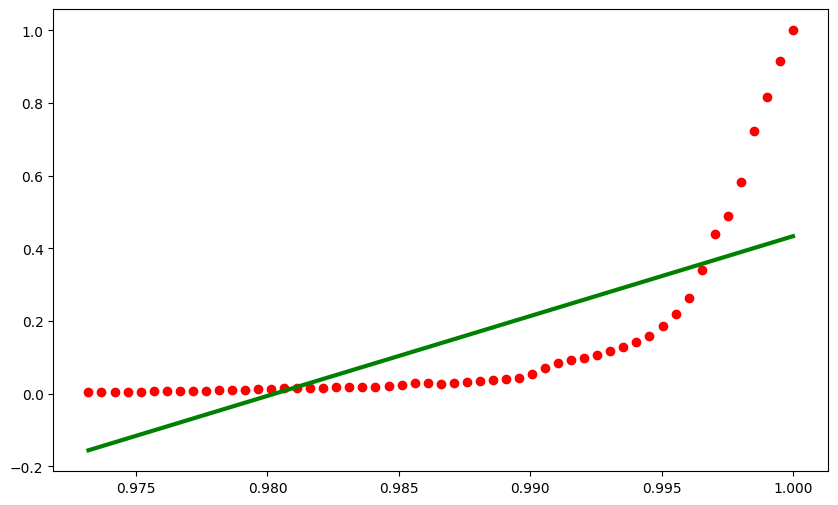

In [39]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X, yhat, linewidth=3.0, label='fit', color="Green")
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat, y))

MAE: 0.12657979406214762


In [41]:
X[0]

array([0.97318769])

* Ploynomial regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [44]:
X_poly[0]

array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725])

In [45]:
model.fit(X_poly, y)

LinearRegression()

In [46]:
yhat=model.predict(X_poly)

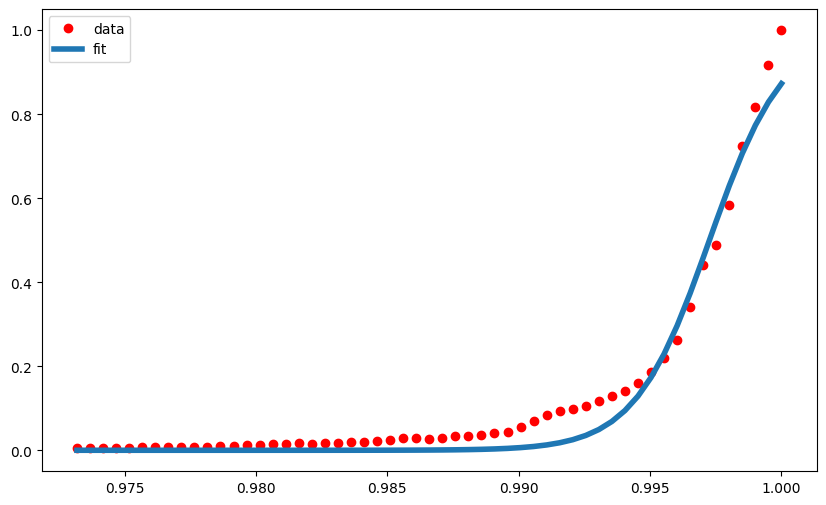

In [54]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X, yhat, linewidth=4.0, label='fit')
plt.legend(loc='best')
plt.show()

In [48]:
print("MAE: ", mean_absolute_error(yhat, y))

MAE:  0.009253921906050316


* curve_fit

In [49]:
x_data, y_data = (df['Year'].values, df['Value'].values)
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [50]:
def sigmoid(x, Beta_1, Beta_2):
  y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
  return y

In [51]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517092123388
beta2=0.9972071272529931


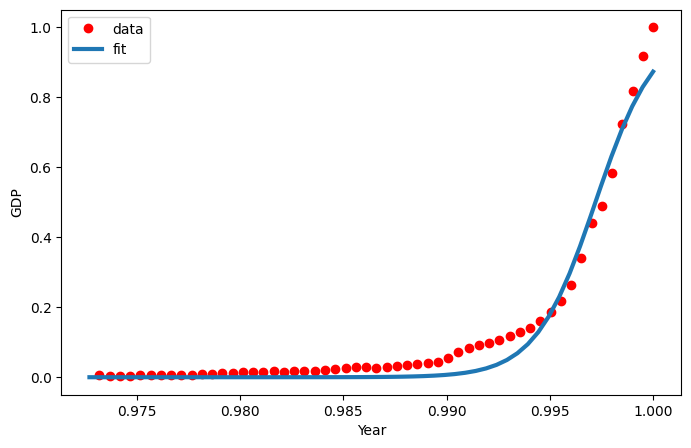

In [53]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize=(8, 5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [55]:
print("MAE", mean_absolute_error(yhat, ydata))

MAE 0.030498418823495136


# Overfitting Underfitting
     

1.   **Underfitting** (kichik kiyim kiyib olishga o'xshaydi!)
                  - model juda ham sodda
                  - Train setda ham test setda ham katta xatolik
                  - High bias (gumon)
2.   **Overfitting**  (katta kiyim kiyib olishga o'xshaydi!)
                  - Model juda ham murakkab
                  - Model train setga moslashib qolgan
                  - Train setda aniqlik baland (Xato  kam)
                  - Test setda aniqlik juda ham past (xato katta)
                  - High variance (farq)

3.  **Good Fit/Robust (Yaxshi model)**
                  - Train va test setlarda birdek, katta aniqlik
                  - Low bias, low variance!



**How to fix them?**


1.   **Underfitting**  - modelni murakkablashtiramiz!
                - Ko'proq parametrlar qo'shish
                - Polynomial darajalarni oshirish
                - Ko'proq qavatlar qo'shish (Deep Learning)

2.   **Overfitting**  - modelni soddalashtiramiz!
                - Parametrlarni kamaytirish
                - Algoritmni o'zgartirish
                - Ploynomial darajalarini kamaytirish
                - Ko'proq ma'lumot yig'ish

